### 회귀분석
- 회귀분석은 실젯값과 예측값의 차이를 기반으로 한 지표들을 중심으로 성능평가 지표가 발전

#### NAE
- 실젯값과 예측값의 차이를 절대값으로 변환하여 평균한 것.
- 에러의 크기가 그래도 반영
- 이상치에 영향을 받음

#### MSE
- 실젯값과 예측값의 차이를 제곱하여 평균한 것.
- 실젯값과 예측값 차이의 면적 합을 의미
- 특이값이 존재하면 수치가 증가

#### RMSE
- 실제값과 예측값의 차이를 제곱한 평균의 루트
- 에러에 제곱을 에러가 클수록 그에 따른 가중치를 높이 반영
- 손실이 기하급수적으로 증가하는 상황에서 실제 오류 평균보다 값이 더 커지는 것을 상쇄하기 위해 사용한다.

#### MSLE
- 실젯값과 예측값의 차이를 제곱해 평균한 것에 로그를 적용한 것
- RMSE와 같이 손실이 기하급수적으로 증가하는 상황에서 실제 오류 평균보다 값이 커지는 것을 상ㅎ쇄하기 위해 사용

#### MAPE
- MAE를 퍼센트로 표시
- 오차가 예측값에서 차지하는 정도

### 회귀분석 순서

1. 데이터를 로드하고 확인
2. 데이터를 분할
3. 데이터의 전처리
4. 모델 학습
5. 성능 평가 및 예측값 저장

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [2]:
data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,))

In [6]:
# df는 독립변수
# target은 종속 변수

# 집 가격 예측하기 위한 데이터니까 
# 타겟 변수는 집 값(value)
df['Value'] = data['target']

In [7]:
#데이터 프레임 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Value       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
#결측치 확인
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Value         0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

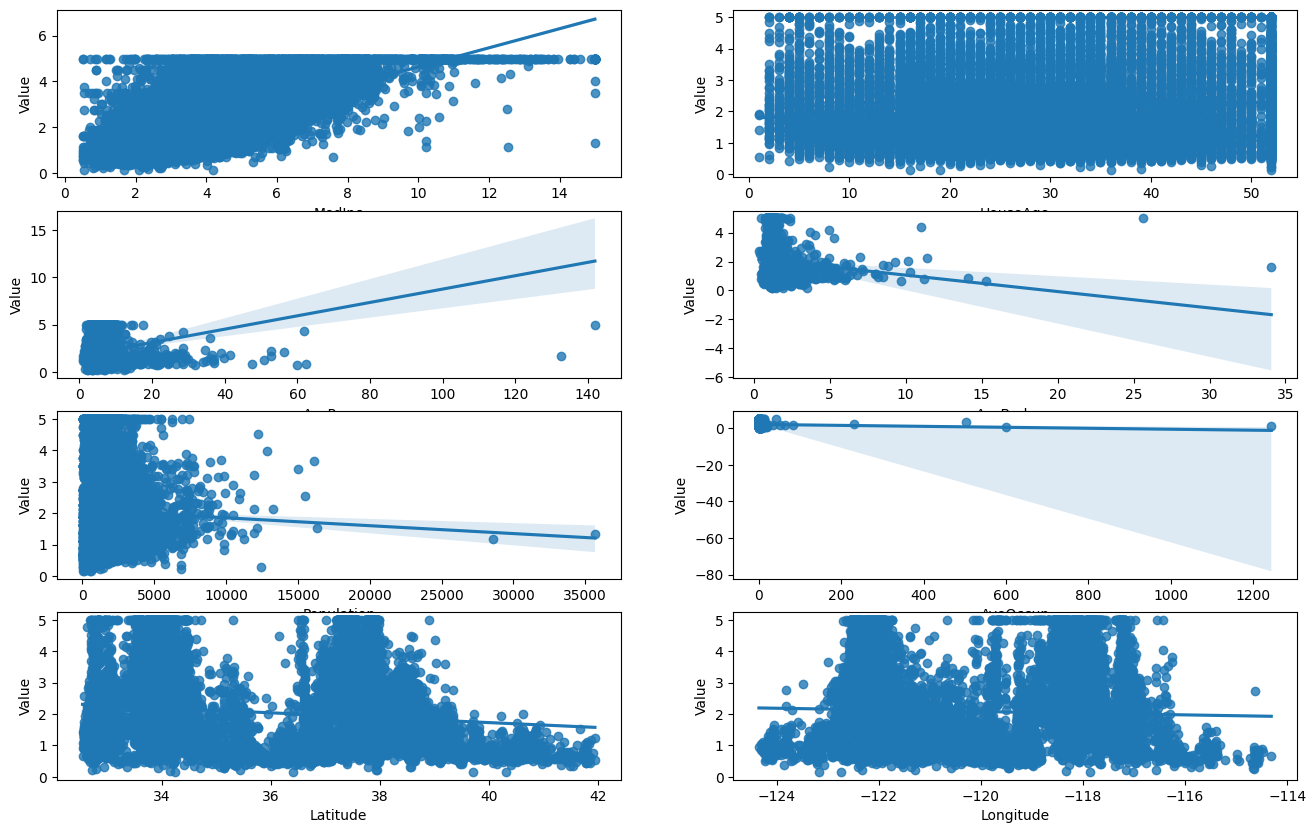

In [ ]:
fig, axes = plt.subplots(figsize = (16,10), nrows = 4, ncols =2)

for i in range(8):
    row = int(i/2)
    col =i%2
    sns.regplot(x=df.iloc[:,i],y=df['Value'],data=df, ax=axes[row][col])

In [ ]:
# 데이터의 분할
# train, test / 독립, 종속
from sklearn.model_selection import train_test_split

x = df.drop('Value', axis =1)
y = df['Value']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [ ]:
# value의 평균을 train, test 확인 
# 평균이 다르므로 데이터가 분할된 것을 확인
print('train 데이터의 value의 평균', y_train.mean())
print('test데이터의 value의 평균',y_test.mean())

train 데이터의 value의 평균 2.0715573843265505
test데이터의 value의 평균 2.056561308139535


In [ ]:
# 데이터를 스케일링 ( std, min-max, Robust, max abs )
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
scaler.fit(x_train)

MaxAbsScaler()

In [ ]:
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

In [ ]:
# 선형 회귀 알고리즘
from sklearn.linear_model import LinearRegression

linear = LinearRegression()

In [ ]:
# fit -> 학습
linear.fit(x_train_sc, y_train)

LinearRegression()

In [ ]:
pred = linear.predict(x_test_sc)

In [ ]:
pred

array([2.07653781, 1.57976836, 2.08731697, ..., 1.04278469, 1.12583146,
       1.9625772 ], shape=(4128,))

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# 학습 데이터를 예측한 결과를 저장
pred = linear.predict(x_train_sc)

mae = mean_absolute_error(y_train,pred)
mse = mean_squared_error(y_train,pred)
rmse = np.sqrt(mse)

# 결정계수 출력
r2 = r2_score(y_train, pred)

print('MAE :',round(mae,2))
print('MSE :',round(mse,2))
print('RMSE :',round(rmse,2))
print('R2_score :',round(r2,2))

MAE : 0.53
MSE : 0.53
RMSE : 0.73
R2_score : 0.6


In [ ]:
###
#std 스케일링 사용해보기
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

# 범위 지정
std.fit(x_train)
x_train_std = std.transform(x_train)
x_test_std = std.transform(x_test)

# 학습 및 예측
linear2 = LinearRegression()        #선형회귀모델 
linear2.fit(x_train_std, y_train)
pred2 = linear2.predict(x_test_std)

std_mae = mean_absolute_error(y_test,pred2)
std_mse = mean_squared_error(y_test,pred2)
std_rmse = np.sqrt(std_mse)

# 결정계수 출력
std_r2 = r2_score(y_test, pred2)

print('MAE :',round(std_mae,2))     # 평균 절대 오차 : 예측값과 실제값 사이 차이의 절댓값 평균
print('MSE :',round(std_mse,2))     # 평균 제곱 오차 : 차이의 제곱 평균
print('RMSE :',round(std_rmse,2))   # 평균 제곱근 오차 : MSE의 제곱근
print('R2_score :',round(std_r2,2)) # 결정 계수 R**2 점수 : 1에 가까울수록 좋고, 0이면 아무것도 설명 못함, 1이면 완벽히 설명함

MAE : 0.53
MSE : 0.51
RMSE : 0.71
R2_score : 0.62


In [ ]:
###
#Robust Scaler 사용
from sklearn.preprocessing import RobustScaler

Ruscaler = RobustScaler()
x_train_ru = Ruscaler.fit_transform(x_train)
x_test_ru = Ruscaler.transform(x_test)

# 학습 및 예측
linear3 = LinearRegression()
linear3.fit(x_train_ru, y_train)
ru_pred = linear3.predict(x_test_ru)

# 평가 지표 계산
ru_mae = mean_absolute_error(y_test,ru_pred)
ru_mse = mean_squared_error(y_test,ru_pred)
ru_rmse = np.sqrt(ru_mse)
ru_r2 = r2_score(y_test, ru_pred)

print('MAE :',round(ru_mae,2))     # 평균 절대 오차 : 예측값과 실제값 사이 차이의 절댓값 평균
print('MSE :',round(ru_mse,2))     # 평균 제곱 오차 : 차이의 제곱 평균
print('RMSE :',round(ru_rmse,2))   # 평균 제곱근 오차 : MSE의 제곱근
print('R2_score :',round(ru_r2,2)) # 결정 계수 R**2 점수 : 1에 가까울수록 좋고, 0이면 아무것도 설명 못함, 1이면 완벽히 설명함

MAE : 0.53
MSE : 0.51
RMSE : 0.71
R2_score : 0.62
